# FIAP
## MBA - Inteligencia Articifial e Machine Learning

Avaliação de métodos de reconhecimento facial utilizando visão computacional

** Eingenfaces, Fisherfaces e Local Binary Patterns Histograms. **
**OPENCV versão(3)**

In [125]:
import cv2
print(cv2.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

%matplotlib inline

plt.style.use('seaborn')

3.4.3


Verificando versão instalada do OpenCV

### Classificador de Faces

Gerando 100 exemplos de faces, utilizando a webcam.

In [86]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

# Extrator de faces
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    
    if faces is ():
        return None
    
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

cap = cv2.VideoCapture(0)
count = 0

# Coletar 100 exemplos de um determinado rosto
while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Amostra", frame)
        if face_extractor(frame) is not None:
            count += 1
            face = cv2.resize(face_extractor(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

            file_name_path = 'imagens/faces/amostras/' + str(count) + '.jpg'
            cv2.imwrite(file_name_path, face)

            # Put count on images and display live count
            cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            cv2.imshow('Rosto Normalizado', face)

        if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
            break
        
cap.release()
cv2.destroyAllWindows()      
print("Colega de amostras completado")

Colega de amostras completado


# Treinamento e implementando o modelo utilizando Eigenfaces

In [137]:
#-----------------------------------------------------------------------------
#TREINANDO O MODELO
#-----------------------------------------------------------------------------
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

# Carregando exemplos de arquivos previamente coletados
data_path = 'imagens/faces/amostras/'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]

training_data, labels = [], []

# Lendo as imagens e associando a um label
for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(images)
    labels.append(0)

# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
model = cv2.face.EigenFaceRecognizer_create()
model.train(training_data, np.array(labels))

print("Modelo treinado com sucesso.")

persons = {0: "Aneilson"}

#-----------------------------------------------------------------------------
#IMPLEMENTANDO O MODELO
#-----------------------------------------------------------------------------


def face_detector(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1, 5)
    if faces is ():
        return img, [], 0, 0
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi, x, y

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    image, face, x, y = face_detector(frame)
    
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        
        print(results)
        
        if x > 0:
            display_string = "Dist. " + str(int(results[1])) + ' ' + persons[results[0]] 
            cv2.putText(image, display_string, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,120,150), 2)

        if int(results[1]) < 40:
            cv2.putText(image, "Reconhecido com sucesso", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)
            cv2.imshow('Face Recognition', image)
        else:
            cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Face Recognition', image)
    except:
        cv2.putText(image, "Rosto nao identificado", (220, 120) , cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.imshow('Face Recognition', image )
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()


Modelo treinado com sucesso.
(0, 4207.737761541747)
(0, 4169.31509794049)
(0, 4225.149071001662)
(0, 4032.0394657437987)
(0, 3892.91032284985)
(0, 3857.1807318072993)
(0, 3778.244313563114)
(0, 3716.965631621628)
(0, 3602.441192865638)
(0, 3618.517695401275)
(0, 3715.9974703909184)
(0, 3868.477728059961)
(0, 3601.8248622421456)
(0, 3680.367564217831)
(0, 3902.327824082043)
(0, 3714.4685480238177)
(0, 3760.8948427304026)
(0, 3406.8325985331685)
(0, 3407.337328065751)
(0, 3372.238190574605)
(0, 3428.6478895908185)
(0, 3614.999644045137)
(0, 3456.2306157533594)
(0, 3400.779065009013)
(0, 3305.725287756923)
(0, 3240.108106764665)
(0, 3383.6310782161254)
(0, 3470.67467235901)
(0, 3508.2879289025723)
(0, 3634.2884000692698)
(0, 3520.788031309579)
(0, 3588.5603739017233)
(0, 3584.8311255804797)
(0, 3607.8070509319887)
(0, 3622.6934603009204)
(0, 3444.479749318788)
(0, 3433.817268546472)
(0, 3450.5507097096774)
(0, 3811.6873679094365)


# Treinamento e implementando o modelo utilizando FisherFace

In [ ]:
#-----------------------------------------------------------------------------
#TREINANDO O MODELO
#-----------------------------------------------------------------------------
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

# Carregando exemplos de arquivos previamente coletados
data_path = 'imagens/faces/amostras/'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]

training_data, labels = [], []

# Lendo as imagens e associando a um label
for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(images)
    labels.append(0)

# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
model = cv2.face.FisherFaceRecognizer_create()
model.train(training_data, np.array(labels))

print("Modelo treinado com sucesso.")

persons = {0: "Aneilson"}

#-----------------------------------------------------------------------------
#IMPLEMENTANDO O MODELO
#-----------------------------------------------------------------------------


def face_detector(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1, 5)
    if faces is ():
        return img, [], 0, 0
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi, x, y

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    image, face, x, y = face_detector(frame)
    
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        
        print(results)
        
        if x > 0:
            display_string = "Dist. " + str(int(results[1])) + ' ' + persons[results[0]] 
            cv2.putText(image, display_string, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,120,150), 2)

        if int(results[1]) < 40:
            cv2.putText(image, "Reconhecido com sucesso", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)
            cv2.imshow('Face Recognition', image)
        else:
            cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Face Recognition', image)
    except:
        cv2.putText(image, "Rosto nao identificado", (220, 120) , cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.imshow('Face Recognition', image )
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()


# Treinamento e implementando o modelo utilizando Local Binary Patterns Histograms

In [138]:
#-----------------------------------------------------------------------------
#TREINANDO O MODELO
#-----------------------------------------------------------------------------
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

# Carregando exemplos de arquivos previamente coletados
data_path = 'imagens/faces/amostras/'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]

training_data, labels = [], []

# Lendo as imagens e associando a um label
for i, files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(images)
    labels.append(0)

# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
model = cv2.face.LBPHFaceRecognizer_create()
model.train(training_data, np.array(labels))

print("Modelo treinado com sucesso.")

persons = {0: "Aneilson"}

#-----------------------------------------------------------------------------
#IMPLEMENTANDO O MODELO
#-----------------------------------------------------------------------------

def face_detector(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1, 5)
    if faces is ():
        return img, [], 0, 0
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))
    return img, roi, x, y

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    image, face, x, y = face_detector(frame)
    
    try:
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        
        print(results)
        
        if x > 0:
            display_string = "Dist. " + str(int(results[1])) + ' ' + persons[results[0]] 
            cv2.putText(image, display_string, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (255,120,150), 2)

        if int(results[1]) < 40:
            cv2.putText(image, "Reconhecido com sucesso", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)
            cv2.imshow('Face Recognition', image)
        else:
            cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Face Recognition', image)
    except:
        cv2.putText(image, "Rosto nao identificado", (220, 120) , cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.putText(image, "Nao reconhecido", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
        cv2.imshow('Face Recognition', image )
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()


Modelo treinado com sucesso.
<face_LBPHFaceRecognizer 000001D5C1F20AD0>
(0, 46.98947458670153)
(0, 46.13726245149308)
(0, 44.049634503868354)
(0, 43.89674809216305)
(0, 45.137743222974386)
(0, 44.878377954063474)
(0, 44.05196948157857)
(0, 45.8536836318809)
(0, 45.66919546842918)
(0, 45.413234301182534)
(0, 45.140096560500055)
(0, 44.79662969362702)
(0, 44.05896636159053)
(0, 44.126207169641184)
(0, 43.816250903864955)
(0, 44.13387387549767)
(0, 43.382454344903444)
(0, 44.430285941135914)
(0, 43.556674223212326)
(0, 43.664281456310675)
(0, 43.59627146201785)
(0, 44.05305060095845)
(0, 43.7392606190862)
(0, 43.94311014610167)
(0, 44.803418772674085)
(0, 44.97304716019787)
(0, 44.01619757036951)
(0, 44.966749773126615)


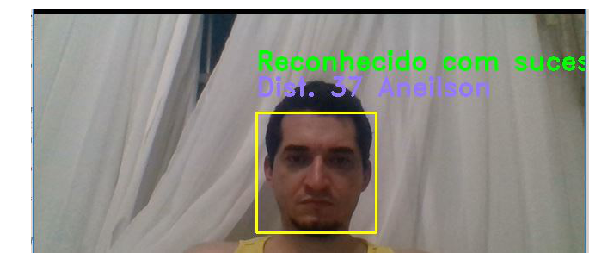

In [127]:
def exibir_imagem(imagem):
    figure(num=None, figsize=(10, 10))
    image_plt = mpimg.imread(imagem)
    plt.imshow(image_plt)
    plt.axis('off')
    plt.show()
    
exibir_imagem('imagens/reconhecimentoFacial.jpg')